In [4]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [5]:
import pandas as pd
import numpy as np
from fastai.tabular.core import *
from fastai.data.transforms import *
from fastcore.all import *
import seaborn as sns
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [6]:
%matplotlib inline
import plotly as py
import plotly.tools as tls
import matplotlib.pyplot as plt

# py.offline.init_notebook_mode(connected=True)
# from plotly.offline import iplot

# pd.options.plotting.backend = "plotly"

# import seaborn as sns
# import matplotlib.pyplot as plt

## initial viz settings ##
sns.set(font_scale=1.2)
col = "#3B1C8C"
cm = "viridis"
import plotly.graph_objects as go


<IPython.core.display.Javascript object>

In [7]:
%%time
df = pd.read_feather('attendance_meeting_append_data.feather')

CPU times: user 12.1 s, sys: 20.4 s, total: 32.5 s
Wall time: 15.9 s


<IPython.core.display.Javascript object>

In [8]:
len(df)

23035206

<IPython.core.display.Javascript object>

In [9]:
%%time
# df = pd.read_csv(path)
make_date(df, "ATTENDANCEDATE")
add_datepart(df, "ATTENDANCEDATE")

CPU times: user 21.2 s, sys: 18.2 s, total: 39.4 s
Wall time: 43.3 s


,Unnamed: 0,SCHOOLYEAR,PRESENCE_STATUS_CD,GRADE_LEVEL,COURSE_NAME,SCHOOLDCID,STUDENTID,LASTFIRST,SCHOOLID,STUDENTDCID,...,ATTENDANCEDATEDay,ATTENDANCEDATEDayofweek,ATTENDANCEDATEDayofyear,ATTENDANCEDATEIs_month_end,ATTENDANCEDATEIs_month_start,ATTENDANCEDATEIs_quarter_end,ATTENDANCEDATEIs_quarter_start,ATTENDANCEDATEIs_year_end,ATTENDANCEDATEIs_year_start,ATTENDANCEDATEElapsed
0,0,2017,Absent,11,CR American History II,4710,73254,"Haddock, Dominyk Haylei",260408,73254,...,14,0,134,False,False,False,False,False,False,1.526256e+09
1,1,2017,Absent,11,Library/Media Assist,4710,87498,"Burden Rozier, Tyanna Chrissy",260408,87498,...,17,3,137,False,False,False,False,False,False,1.526515e+09
2,2,2017,Absent,9,Principles of Business & Finance,4710,94998,"Royall, Kyson Catrina",260408,94998,...,22,1,142,False,False,False,False,False,False,1.526947e+09
3,3,2017,Absent,9,Visual Arts (Beginning),4710,141790,"Heyse, Gordon Kamaury",260408,660949,...,15,1,135,False,False,False,False,False,False,1.526342e+09
4,4,2017,Present,12,Visual Arts (Intermediate),4710,114606,"Okeke, Nakya Janya",260408,639214,...,15,1,135,False,False,False,False,False,False,1.526342e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23035201,78295,2020,Present,9,Microsoft Word and PowerPoint,4710,131119,"Couch, Dennys Keirsten",260408,651545,...,19,0,293,False,False,False,False,False,False,1.603066e+09
23035202,78296,2020,Present,9,Microsoft Word and PowerPoint,4710,241483,"Huston, Isreal Allie",260408,749972,...,19,0,293,False,False,False,False,False,False,1.603066e+09
23035203,78297,2020,Present,10,Microsoft Word and PowerPoint,4710,164733,"Weisner, Ellyana Yadrian",260408,680476,...,19,0,293,False,False,False,False,False,False,1.603066e+09
23035204,78298,2020,Present,10,Microsoft Word and PowerPoint,4710,79595,"Moellmer, Duron Sheyla",260408,79595,...,19,0,293,False,False,False,False,False,False,1.603066e+09


<IPython.core.display.Javascript object>

In [11]:
list(df.columns)

['Unnamed: 0',
 'SCHOOLYEAR',
 'PRESENCE_STATUS_CD',
 'GRADE_LEVEL',
 'COURSE_NAME',
 'SCHOOLDCID',
 'STUDENTID',
 'LASTFIRST',
 'SCHOOLID',
 'STUDENTDCID',
 'SECTIONENROLLMENTDCID',
 'CALENDARDCID',
 'PERIODDCID',
 'PERIODNAME',
 'ATTENDANCECODEDCID',
 'SCHEDULINGTERMYEARDCID',
 'ATTENDANCEMODECODE',
 'TOTALMINUTESATTENDED',
 'ATTENDANCECOMMENT',
 'ATTENDANCE_CODE_DESCRIPTION',
 'ADAVALUECODE',
 'ADAVALUETIME',
 'ADMVALUE',
 'ATTENDANCEFLAGS',
 'SOURCESYSTEMID',
 'ATTENDANCEMODEFLAG',
 'ATTENDANCEDATEYear',
 'ATTENDANCEDATEMonth',
 'ATTENDANCEDATEWeek',
 'ATTENDANCEDATEDay',
 'ATTENDANCEDATEDayofweek',
 'ATTENDANCEDATEDayofyear',
 'ATTENDANCEDATEIs_month_end',
 'ATTENDANCEDATEIs_month_start',
 'ATTENDANCEDATEIs_quarter_end',
 'ATTENDANCEDATEIs_quarter_start',
 'ATTENDANCEDATEIs_year_end',
 'ATTENDANCEDATEIs_year_start',
 'ATTENDANCEDATEElapsed']

<IPython.core.display.Javascript object>

# attendance plot for years

<AxesSubplot:>

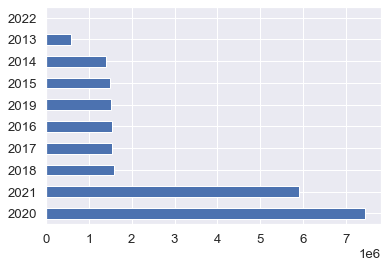

<IPython.core.display.Javascript object>

In [12]:
df.ATTENDANCEDATEYear.value_counts().plot(kind="barh")

In [13]:
df.ATTENDANCEDATEYear.value_counts()

2020    7452996
2021    5920408
2018    1576585
2017    1543119
2016    1541084
2019    1522369
2015    1491934
2014    1402096
2013     584593
2022         22
Name: ATTENDANCEDATEYear, dtype: int64

<IPython.core.display.Javascript object>

In [16]:
df.set_index("ATTENDANCEDATEYear", inplace=True)

<IPython.core.display.Javascript object>

# attendance plot for year 2019

In [18]:
df.loc[2019]["PRESENCE_STATUS_CD"].value_counts()  # .plot(kind="bar")

Absent     1039084
Present     483285
Name: PRESENCE_STATUS_CD, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:>

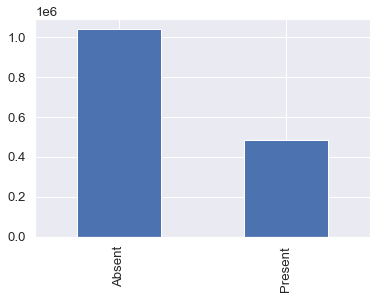

<IPython.core.display.Javascript object>

In [19]:
df.loc[2019]["PRESENCE_STATUS_CD"].value_counts().plot(kind="bar")

# attendance plot for year 2018

In [20]:
df.loc[2018]["PRESENCE_STATUS_CD"].value_counts()  # .plot(kind="bar")

Absent     1101741
Present     474844
Name: PRESENCE_STATUS_CD, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:>

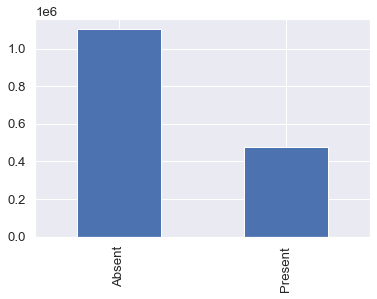

<IPython.core.display.Javascript object>

In [24]:
df.loc[2018]["PRESENCE_STATUS_CD"].value_counts().plot(kind="bar")

# attendance plot for year 2019 and grade 12

In [23]:
df_grade_2019_12 = df.loc[2019][df.loc[2019].GRADE_LEVEL == 12]

<IPython.core.display.Javascript object>

In [25]:
df_grade_2019_12 = df_grade_2019_12.copy()

<IPython.core.display.Javascript object>

In [26]:
df_grade_2019_12.set_index("STUDENTID", inplace=True)

<IPython.core.display.Javascript object>

# attendance plot for year 2019 student

In [27]:
df_grade_2019_12.loc[79200]["PRESENCE_STATUS_CD"].value_counts()

Absent     30
Present     9
Name: PRESENCE_STATUS_CD, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:>

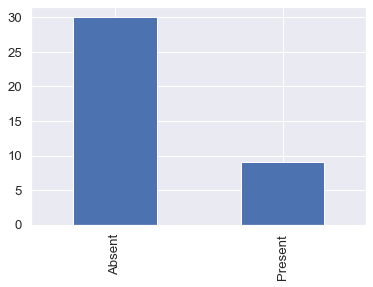

<IPython.core.display.Javascript object>

In [28]:
df_grade_2019_12.loc[79200]["PRESENCE_STATUS_CD"].value_counts().plot(kind="bar")

In [35]:
def get_attend_count(student_id, df):
    return df.loc[student_id]["PRESENCE_STATUS_CD"].value_counts()

<IPython.core.display.Javascript object>

In [36]:
get_attend_count(79200, df_grade_2019_12)

Absent     30
Present     9
Name: PRESENCE_STATUS_CD, dtype: int64

<IPython.core.display.Javascript object>

In [37]:
df_grade_2019_12.sample(10).index

Int64Index([187483, 76853, 76731, 77473, 69861, 79706, 66563, 161674, 141898,
            75834],
           dtype='int64', name='STUDENTID')

<IPython.core.display.Javascript object>

In [38]:
for idx in df_grade_2019_12.sample(10).index:
    print(get_attend_count(idx, df_grade_2019_12))
    print("------------------------------------------")

Absent     82
Present    22
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     22
Present     4
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     187
Present     10
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     19
Present     4
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     10
Present     4
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     68
Present    18
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     170
Present     30
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     90
Present     6
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     126
Present     35
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Abse

<IPython.core.display.Javascript object>

In [39]:
df_grade_2018_12 = df.loc[2018][df.loc[2018].GRADE_LEVEL == 12]

<IPython.core.display.Javascript object>

In [40]:
df_grade_2018_12 = df_grade_2018_12.copy()

<IPython.core.display.Javascript object>

In [41]:
df_grade_2018_12.set_index("STUDENTID", inplace=True)

<IPython.core.display.Javascript object>

In [42]:
df_grade_2018_12.sample(10).index

Int64Index([67302, 75474, 216815, 97844, 80831, 81546, 74018, 59795, 203153,
            135372],
           dtype='int64', name='STUDENTID')

<IPython.core.display.Javascript object>

In [43]:
for idx in df_grade_2018_12.sample(10).index:
    print(get_attend_count(idx, df_grade_2018_12))
    print("------------------------------------------")

Absent     6
Present    3
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     55
Present     9
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     304
Present     30
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     82
Present    35
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     20
Present     1
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     16
Present     2
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     79
Present    11
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     92
Present    13
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Present    4
Name: PRESENCE_STATUS_CD, dtype: int64
------------------------------------------
Absent     29
Present    

<IPython.core.display.Javascript object>

In [49]:
df_2019 = df.loc[2019]

<IPython.core.display.Javascript object>

In [50]:
df_grade_2019_12 = df_2019[df_2019.GRADE_LEVEL == 12].copy()

<IPython.core.display.Javascript object>

In [51]:
df_grade_2019_12_Absent = df_grade_2019_12[
    df_grade_2019_12.PRESENCE_STATUS_CD == "Absent"
].copy()

<IPython.core.display.Javascript object>

In [52]:
df_grade_2019_12_Absent.set_index("STUDENTID", inplace=True)

<IPython.core.display.Javascript object>

In [84]:
# df_grade_2019_12_Absent.groupby("STUDENTID").count()[
#     "PRESENCE_STATUS_CD"
# ].sort_values()[::-1].plot(kind="scatter")

<IPython.core.display.Javascript object>

In [85]:
df_mid = (
    df_grade_2019_12_Absent.groupby("STUDENTID")
    .count()["PRESENCE_STATUS_CD"]
    .sort_values()[::-1]
)

<IPython.core.display.Javascript object>

In [86]:
df_mid[df_mid.values < 50][0:20]  #  50 count as mid value from scatter plot

STUDENTID
201303    49
92221     49
73714     49
195322    49
101794    49
74806     49
87996     49
73157     49
76149     49
75873     49
90613     49
74652     49
144079    49
166054    49
73375     49
162269    49
76816     49
73988     49
78740     49
79832     49
Name: PRESENCE_STATUS_CD, dtype: int64

<IPython.core.display.Javascript object>

In [58]:
df_grade_2019_12_Absent.groupby("STUDENTID").count()[
    "PRESENCE_STATUS_CD"
].sort_values()[::-1][
    0:20
]  # top 20 high absent

STUDENTID
67757     414
71274     270
70704     265
77101     240
193393    229
177565    218
158695    215
72326     210
70736     208
69026     205
80080     203
72500     202
164448    195
77334     194
100327    191
219282    188
79227     187
66991     187
182795    187
75599     186
Name: PRESENCE_STATUS_CD, dtype: int64

<IPython.core.display.Javascript object>

In [60]:
top_20_absent_count_student = (
    df_grade_2019_12_Absent.groupby("STUDENTID")
    .count()["PRESENCE_STATUS_CD"]
    .sort_values()[::-1][0:20]
)

<IPython.core.display.Javascript object>

In [61]:
top_20_absent_count_student.index

Int64Index([ 67757,  71274,  70704,  77101, 193393, 177565, 158695,  72326,
             70736,  69026,  80080,  72500, 164448,  77334, 100327, 219282,
             79227,  66991, 182795,  75599],
           dtype='int64', name='STUDENTID')

<IPython.core.display.Javascript object>

# top 20 value attendance count plot for course name

In [62]:
df_heatmap = (
    df_grade_2019_12_Absent.loc[top_20_absent_count_student.index]
    .groupby(["STUDENTID", "COURSE_NAME"])
    .count()["PRESENCE_STATUS_CD"]
    .unstack()
)

<IPython.core.display.Javascript object>

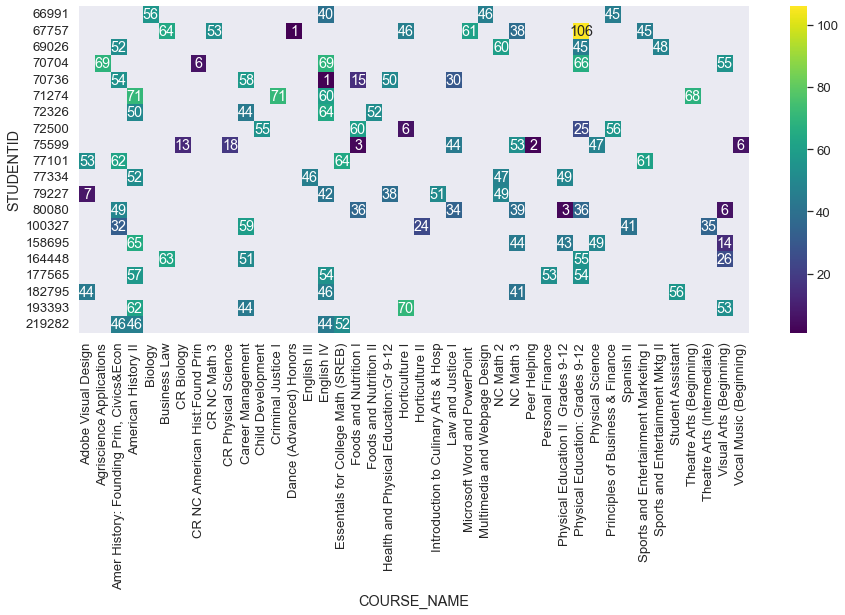

<IPython.core.display.Javascript object>

In [63]:
df_heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(df_heatmap, annot=True, fmt="g", cmap=cm)
plt.show()

In [70]:
mid_20_absent_count_student = df_mid[df_mid.values < 50][0:20]

<IPython.core.display.Javascript object>

In [71]:
mid_20_absent_count_student.index

Int64Index([201303,  92221,  73714, 195322, 101794,  74806,  87996,  73157,
             76149,  75873,  90613,  74652, 144079, 166054,  73375, 162269,
             76816,  73988,  78740,  79832],
           dtype='int64', name='STUDENTID')

<IPython.core.display.Javascript object>

In [72]:
df_heatmap = (
    df_grade_2019_12_Absent.loc[mid_20_absent_count_student.index]
    .groupby(["STUDENTID", "COURSE_NAME"])
    .count()["PRESENCE_STATUS_CD"]
    .unstack()
)

<IPython.core.display.Javascript object>

# mid 20 value attendance count plot for course name

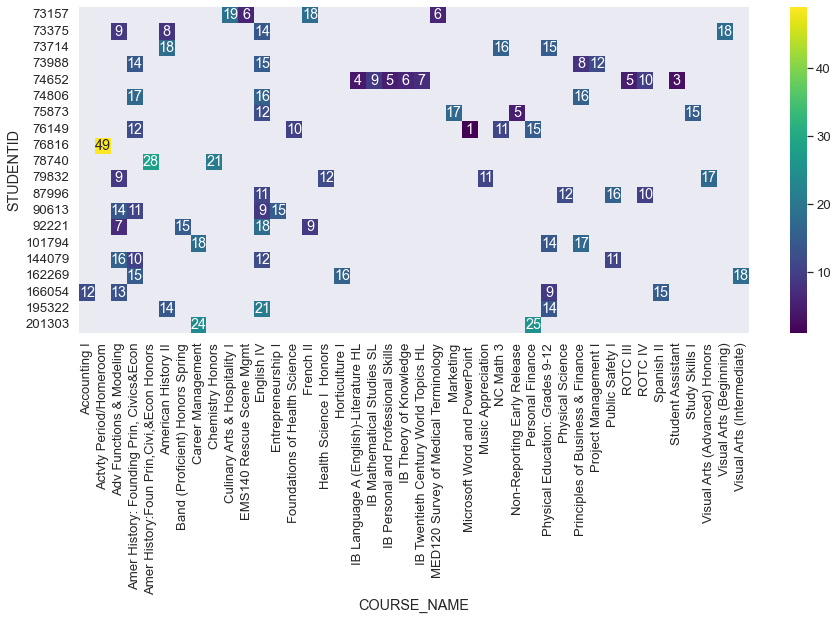

<IPython.core.display.Javascript object>

In [73]:
df_heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(df_heatmap, annot=True, fmt="g", cmap=cm)
plt.show()

In [76]:
df_heatmap = (
    df_grade_2019_12_Absent.groupby(["STUDENTID", "PERIODNAME"])
    .count()["PRESENCE_STATUS_CD"][mid_20_absent_count_student.index]
    .unstack()
)

<IPython.core.display.Javascript object>

# mid 20 value attendance count plot for PERIODNAME

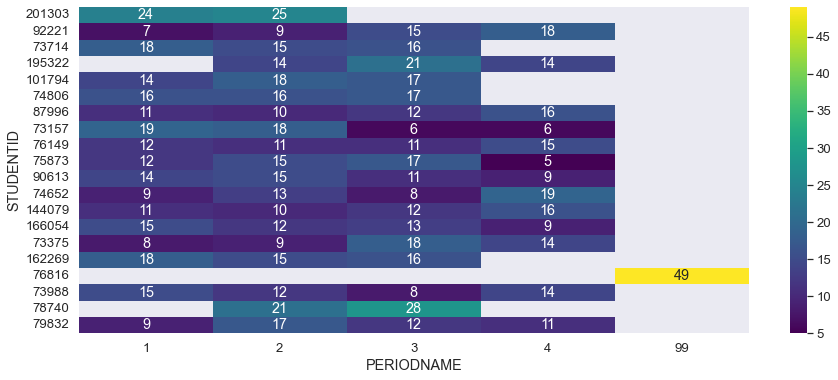

<IPython.core.display.Javascript object>

In [77]:
# df_heatmap
df_heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(df_heatmap, annot=True, fmt="g", cmap=cm)
plt.show()

In [78]:
top_20_absent_count_student.index

Int64Index([ 67757,  71274,  70704,  77101, 193393, 177565, 158695,  72326,
             70736,  69026,  80080,  72500, 164448,  77334, 100327, 219282,
             79227,  66991, 182795,  75599],
           dtype='int64', name='STUDENTID')

<IPython.core.display.Javascript object>

In [79]:
df_heatmap = (
    df_grade_2019_12_Absent.groupby(["STUDENTID", "PERIODNAME"])
    .count()["PRESENCE_STATUS_CD"][top_20_absent_count_student.index]
    .unstack()
)

<IPython.core.display.Javascript object>

# top 20 value attendance count plot for PERIODNAME

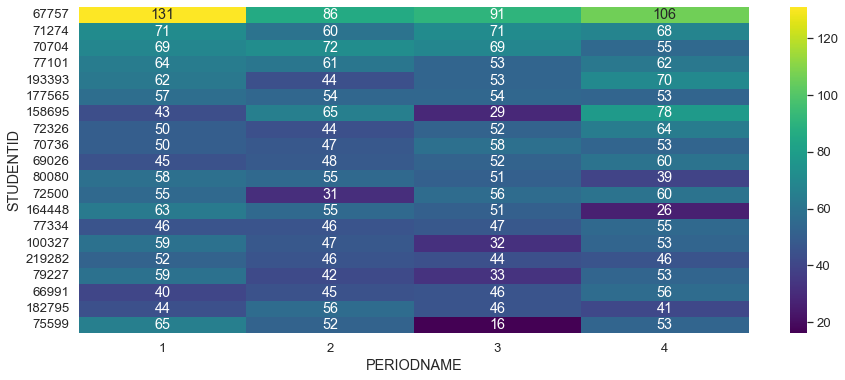

<IPython.core.display.Javascript object>

In [80]:
# df_heatmap
df_heatmap
plt.figure(figsize=(15, 6))
sns.heatmap(df_heatmap, annot=True, fmt="g", cmap=cm)
plt.show()

# Questions

1) How can we get the course information for given year and school?
2) what macro level informartion we should look for studenwise, course wise, school wise or date wise?
3) Number of class room happeing for subject in a year in a school and what all students or enrolled in those classes?
4) can one student attend one class for 10 day and other student in same grade for 3 months?